In [1]:
import sys, os
sys.path.append('/Users/janek/Coding/PersonalProjects/playground/pdfGPT/pdfgpt/server')
import parse_pdf_V2 as parser
import utils

In [2]:
# path_to_pdf = "/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/dobbs_v_jackson.pdf"
path_to_pdf = "/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/phillip_vs_barclays.pdf"
pdf_name = path_to_pdf.split('/')[-1]

In [3]:
text_objects = parser.get_paragraphs(path_to_pdf, pdf_name, long=True)
# 2. collect metadata
texts, metadata = utils.get_metadata(text_objects)

100%|███████████████████████████████████████████████████████████████████████| 1611/1611 [00:00<00:00, 1224320.30it/s]

[{'content': ' On appeal from: [2022] EWCA Civ 318 Philipp (Respondent)  v  Barclays Bank UK PLC Intervener – Consumers’ Association (Instructed by Penningtons Manches Cooper LLP) (Instructed by White & Case LLP (London)) LORD LEGGATT (with whom Lord Reed, Lord Hodge, Lord Sales and Lord Hamblen 1.', 'page': 1, 'title': 'phillip_vs_barclays.pdf', 'start_line': 1}, {'content': ' In 2018 Mrs Fiona Philipp and her husband, Dr Robin Philipp, fell victim to a fraud. They were deceived by criminals into instructing Barclays Bank (“the Bank”) to transfer £700,000 in two payments from Mrs Philipp’s current account with the Bank to bank accounts in the United Arab Emirates (“UAE”). The payments were made and the money was lost. In these proceedings Mrs Philipp claims that the Bank is responsible for this loss. She contends that the Bank owed her a duty under its contract with her or at common law not to carry out her payment instructions if - as was allegedly the case here - the Bank had reason

In [5]:
for i, text in enumerate(texts[:20]):
    print(i, text, '\n')

0  On appeal from: [2022] EWCA Civ 318 Philipp (Respondent)  v  Barclays Bank UK PLC Intervener – Consumers’ Association (Instructed by Penningtons Manches Cooper LLP) (Instructed by White & Case LLP (London)) LORD LEGGATT (with whom Lord Reed, Lord Hodge, Lord Sales and Lord Hamblen 1. 

1  In 2018 Mrs Fiona Philipp and her husband, Dr Robin Philipp, fell victim to a fraud. They were deceived by criminals into instructing Barclays Bank (“the Bank”) to transfer £700,000 in two payments from Mrs Philipp’s current account with the Bank to bank accounts in the United Arab Emirates (“UAE”). The payments were made and the money was lost. In these proceedings Mrs Philipp claims that the Bank is responsible for this loss. She contends that the Bank owed her a duty under its contract with her or at common law not to carry out her payment instructions if - as was allegedly the case here - the Bank had reasonable grounds for believing that she was being defrauded. 

2  The Bank applied to have t

In [4]:
doc = fitz.open(path_to_pdf)
print(doc)

Document('/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/dobbs_v_jackson.pdf')


In [5]:
page_num = 2
paragraphs = [text[4] for text in doc[page_num].get_text('blocks')]

for i, t in enumerate(paragraphs):
    print(i, t)
    print()

0  
 
 
 


1  


2  
 
 
  
 


3  


4  
 
 
 
 
 
 
 


5  
 
 
 
  


6  


7  
 
 


8  


9   
  
  
 


10 3 
Cite as: 597 U. S. ____ (2022) 


11 Syllabus 


12 the Court has been “reluctant” to recognize rights that are not men-
tioned in the Constitution.  Collins v. Harker Heights, 503 U. S. 115, 125. 
Guided by the history and tradition that map the essential compo-


13 nents of the Nation’s concept of ordered liberty, the Court finds the 
Fourteenth Amendment clearly does not protect the right to an abor-
tion. Until the latter part of the 20th century, there was no support in 
American law for a constitutional right to obtain an abortion.  No state 
constitutional provision had recognized such a right.  Until a few years 
before Roe, no federal or state court had recognized such a right.  Nor 
had any scholarly treatise.  Indeed, abortion had long been a crime in 
every single State. At common law, abortion was criminal in at least 
some stages of pregnancy and was regar

In [6]:
paragraphs

[' \n \n \n \n',
 ' \n',
 ' \n \n \n  \n \n',
 ' \n',
 ' \n \n \n \n \n \n \n \n',
 ' \n \n \n \n  \n',
 ' \n',
 ' \n \n \n',
 ' \n',
 '  \n  \n  \n \n',
 '3 \nCite as: 597 U. S. ____ (2022) \n',
 'Syllabus \n',
 'the Court has been “reluctant” to recognize rights that are not men-\ntioned in the Constitution.  Collins v. Harker Heights, 503 U. S. 115, 125. \nGuided by the history and tradition that map the essential compo-\n',
 'nents of the Nation’s concept of ordered liberty, the Court finds the \nFourteenth Amendment clearly does not protect the right to an abor-\ntion. Until the latter part of the 20th century, there was no support in \nAmerican law for a constitutional right to obtain an abortion.  No state \nconstitutional provision had recognized such a right.  Until a few years \nbefore Roe, no federal or state court had recognized such a right.  Nor \nhad any scholarly treatise.  Indeed, abortion had long been a crime in \nevery single State. At common law, abortion was crimi

# rules for parsing:
### 1. paragraph must start with a capital letter. If it does not it must be merged to the previous one.
### 2. paragraph must finish with a dot. if it does not then the next paragraph must be merged to it. (hopefullly solving 1st point will remove need fo rthis point, but they could run one after the other in a sequence)

Hovewer then there is also this problem that some paragraphs are unnecesarily glued together. how coudl we break them down into shorter pieces? if we were just merging as defined in points 1 and 2, we woudl endup with one large piece of text. we need a way to break down pieces of text to seperate paragraphs too.

### 3. paragraph could end when parsing each line, we see that one line is short. However some paragraphs might run till the end. 

# another idea for rules for parsing.
### 1. split when there is this sequence '. \n' - this means that there was an end of line followed by a lien break. this will usually mean a new paragraph. It doesn't happen often that a sentence would run till the end to end a paragraph
### 2. Alternatively, in addition, you could count how many words occured in that line. If not many -> then it was a clear line break to finish a paragraph. If there were many, implying the sentence took a full width of page, then maybe you can decide not to split. You may just endup somethimes with long paragraphs but that doesn't sound too bad

# What do to do with short paragraphs? 

This aren't necesarily bad. sometimes they will contain important information such as title or the author.

On the other hand they realey contain enough context for the software to know what they actually are

# what problems do we have?
### 1. we can extract all words from a file. What is problematic is spliting that text into meanigful paragraphs. 

In [33]:
# try extracting one line at a time.

page_num = 2
page = doc[page_num]
parsed_page = page.get_text("dict")
for paragraph in parsed_page['blocks']:
    for i, line in enumerate(paragraph['lines']):
        line_text = (' ').join([span['text'] for span in line['spans']])
        line_text = line_text.rstrip()
        if len(line_text) > 0:
            print(line_text, line_text[-1] == '.', '\n')


3 False 

Cite as: 597 U. S. ____ (2022) False 

Syllabus False 

the Court has been “reluctant” to recognize rights that are not men- False 

tioned in the Constitution.   Collins  v.  Harker Heights , 503 U. S. 115, 125. True 

Guided by the history and tradition that map the essential compo- False 

nents of the Nation’s concept of ordered liberty, the Court finds the False 

Fourteenth Amendment clearly does not protect the right to an abor- False 

tion. Until the latter part of the 20th century, there was no support in False 

American law for a constitutional right to obtain an abortion.  No state False 

constitutional provision had recognized such a right.  Until a few years False 

before  Roe , no federal or state court had recognized such a right.  Nor False 

had any scholarly treatise.  Indeed, abortion had long been a  crime  in False 

every single State. At common law, abortion was criminal in at least False 

some stages of pregnancy and was regarded as unlawful and c

In [128]:
def get_page_lines(page):
    lines = []
    line_numbers = []
    i = 1
    parsed_page = page.get_text("dict")
    for paragraph in parsed_page['blocks']:
        if 'lines' in paragraph:
            for line in paragraph['lines']:
                line_text = (' ').join([span['text'] for span in line['spans']])
                line_text = line_text.rstrip()
                if len(line_text) > 0:
                    lines.append(line_text)
                    line_numbers.append(i)
                    i += 1
    return lines, line_numbers

def get_doc_lines(doc):
    ''' combine all line objects into a single list 
    page count starts from 1 not 0 (thus: n+1 below)
    '''
    N = len(doc)
    doc_lines = []
    for n in tqdm(range(N)):
        page = doc[n]
        page_lines, page_line_numbers = get_page_lines(page)
        page_lines = [{'content': text, 'page': n+1, 'start_line': i} for text, i in zip(page_lines, page_line_numbers)]
        doc_lines += page_lines
    return doc_lines

def get_mean_line_length(lines):
    ''' return mean number of characters in a line. '''
    line_lengths = []
    for line in lines:
        line_lengths.append(len(line))
    return np.mean(line_lengths)

def word_break_edge_case(line):
    ''' function coverign an edge case where line ends with a word break i.e.
    "Thomas went out fi-
    shing with friends."
    
    We would like two halfs of the word to be joined post merger of lines.
    '''
    if line[-1] == '-':
        return line[:-1], ''
    else:
        return line, ' '

    
def combine_lines_into_paragraphs(lines, title, long):
    ''' note, we are using a hardcoded threshold here. 
    We need to use some smart way to use the disribution of line lengths to find what could be the sortest line 
    that wouldn't indicate a new paragraph. But note even then we only consider liens which end with .!? so the chances that it is actuallya finish 
    of a paragraph are quite high. 
    
    each paragraph should be a dict:
    {
        'content': text,
        'page': n,
        'title': filename,
        'start_line': m,
    }
    '''
    paragraphs = []
    new_paragraph = None
    mean_length = get_mean_line_length([line['content'] for line in lines]) # mean will be skewed towards shorter sentences becasue there won't be many much longer
    for line in tqdm(lines):
        if new_paragraph is None:
            new_paragraph = {'content': '',
                             'page': line['page'],
                             'title': title,
                             'start_line': line['start_line']
                            }
        if len(line['content']) > 1:
            
            line['content'], space = word_break_edge_case(line['content'])
            
            if (line['content'][-1] in '.?!') and (line['content'][-2] != ' '):
                new_paragraph['content'] += space + line['content']
                if long:
                    if len(line['content']) > mean_length: # still the same paragraph
                        continue
                    else: # it's a new paragraph
                        paragraphs.append(new_paragraph)
                        new_paragraph = None
                else:
                    paragraphs.append(new_paragraph)
                    new_paragraph = None
            else:
                if len(line['content']) < (mean_length / 2):
                    # if it's shorter than ~20 characters than it's probably soe miscelenous artefact
                    continue
                else:
                    new_paragraph['content'] += space + line['content']
    return paragraphs

def get_paragraphs(path_to_pdf, title, long=False):
    doc = fitz.open(path_to_pdf)
    doc_lines = get_doc_lines(doc)
    paragraphs = combine_lines_into_paragraphs(doc_lines, title, long)
    return paragraphs

# path_to_pdf = "/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/dobbs_v_jackson.pdf"
path_to_pdf = "/Users/janek/Coding/PersonalProjects/playground/pdfGPT/assets/animalFarmSummaryAndAnalysis.pdf"
title = "dobbs_v_jackson.pdf"
paragraphs = get_paragraphs(path_to_pdf, title)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 679/679 [00:00<00:00, 975319.32it/s]


In [129]:
len(paragraphs)

144

In [138]:
ord(paragraphs[0]['content'][-2])

65533

In [130]:
for par in paragraphs:
    print(par['content'], '\n')

 George Orwell – Animal Farm Summary and Analysis Eric Blair, well-known with his pen name George Orwell, was a strong believer of democratic socialism. He fought in wars and witnessed the cruelties of the dictatorship. Being an essayist and novelist his political viewpoints came forth in the form of Animal Farm. The novella is an allegory and attacks the rule of Stalin with the help of animal characters. Orwell explained about his dystopian �o�ella a�d the i�te�tio� �ehi�d his atte�pt th�ough the essa� �Wh� I W�ite�. 

 Animal Farm, after getting rejected by many publishing houses due to the political satires, finally got published in the year 1945, 17 th  August, while the essay was written in the year 1946. The novella is fou�d i� te� �hapte�s a�d its o�igi�al title �as �A�i�al Fa��: A Fai�y “to���. The su�title was removed in the American version of the novella and now the subtitle is rarely used. The story resembles the Russian Revolution, Spanish Civil war, Soviet Union and the r

In [110]:
doc = fitz.open(path_to_pdf)
page = doc[0]
lines = []
line_numbers = []
i = 1
parsed_page = page.get_text("dict")
for paragraph in parsed_page['blocks']:
    for line in paragraph['lines']:
        line_text = (' ').join([span['text'] for span in line['spans']])
        line_text = line_text.rstrip()
        if len(line_text) > 0:
            lines.append(line_text)
            line_numbers.append(i)
            i += 1

KeyError: 'lines'

In [118]:
parsed_page['blocks'][6] #['lines']

{'number': 6,
 'type': 0,
 'bbox': (123.62000274658203, 99.84223937988281, 491.5, 119.28764343261719),
 'lines': [{'spans': [{'size': 14.039999961853027,
     'flags': 20,
     'font': 'Times New Roman,Bold',
     'color': 0,
     'ascender': 0.89111328125,
     'descender': -0.21630859375,
     'text': '“Analysis of Social Aspect in George Orwell’s Animal Farm”',
     'origin': (123.62000274658203, 114.5),
     'bbox': (123.62000274658203,
      99.84223937988281,
      488.3199768066406,
      119.28764343261719)},
    {'size': 12.0,
     'flags': 20,
     'font': 'Times New Roman,Bold',
     'color': 0,
     'ascender': 1.0440000295639038,
     'descender': -0.3409999907016754,
     'text': ' ',
     'origin': (488.5, 114.5),
     'bbox': (488.5, 101.97200012207031, 491.5, 118.59200286865234)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (123.62000274658203,
    99.84223937988281,
    491.5,
    119.28764343261719)}]}

In [116]:
for i in range(100):
    print(i)
    parsed_page['blocks'][i]['lines']

0
1
2
3
4
5


KeyError: 'lines'

In [108]:
paragraphs[10]

{'content': 'The Court’s decisions have held that the Due Process Clause pro tects two categories of substantive rights—those rights guaranteed by the first eight Amendments to the Constitution and those rightsdeemed fundamental that are not mentioned anywhere in the Consti tution. In deciding whether a right falls into either of these categories, the question is whether the right is “deeply rooted in [our] history andtradition” and whether it is essential to this Nation’s “scheme of or dered liberty.”  Timbs  v.  Indiana , 586 U. S. ___, ___ (internal quotation marks omitted).  The term “liberty” alone provides little guidance.',
 'page': 2,
 'title': 'dobbs_v_jackson.pdf',
 'start_line': 9.0}

In [104]:
paragraphs_long = get_paragraphs(path_to_pdf, title, long=True)
paragraphs_short = get_paragraphs(path_to_pdf, title, long=False)

100%|███████████████████████████████████████████████████████████████████████████████████████| 8333/8333 [00:00<00:00, 1395143.51it/s]


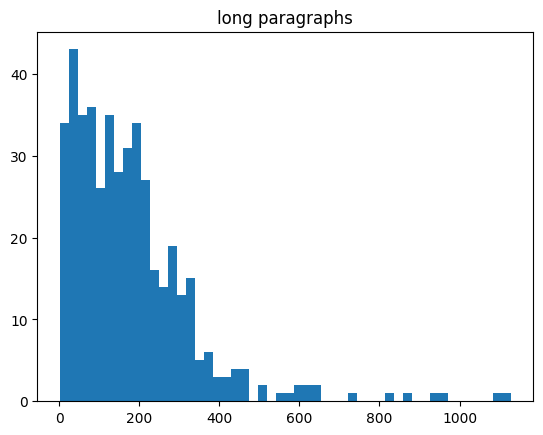

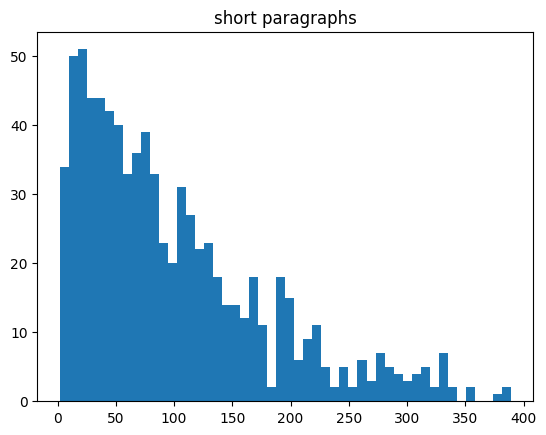

In [105]:
paragraph_length_long = [len(par['content'].split(' ')) for par in paragraphs_long]
paragraph_length_short = [len(par['content'].split(' ')) for par in paragraphs_short]

plt.hist(paragraph_length_long, bins=50)
plt.title('long paragraphs')
plt.show()

plt.hist(paragraph_length_short, bins=50)
plt.title('short paragraphs')
plt.show()

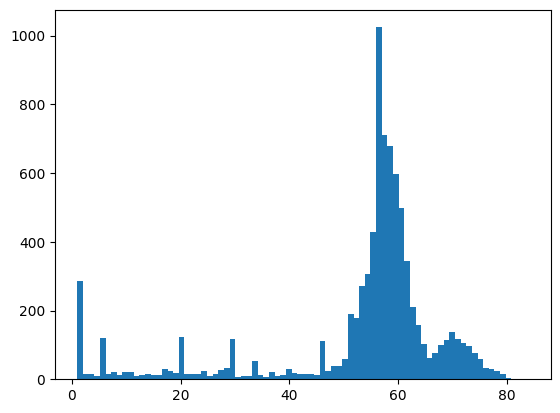

In [93]:
# compute length of lines
line_lengths = []
for line in doc_lines:
    line_lengths.append(len(line))
    
import matplotlib.pyplot as plt

plt.hist(line_lengths, bins=80)
plt.show()

### try keeping only text of certain font size

In [79]:
# try extracting one line at a time.

page_num = 2
page = doc[page_num]
font_sizes = []
parsed_page = page.get_text("dict")
for paragraph in parsed_page['blocks']:
    for i, line in enumerate(paragraph['lines']):
        sizes = [span['size'] for span in line['spans']]
        font_sizes += sizes
        line_text = (' ').join([span['text'] for span in line['spans']])
        line_text = line_text.rstrip()
#         if len(line_text) > 0:
#             print(line_text, line_text[-1] == '.', '\n')

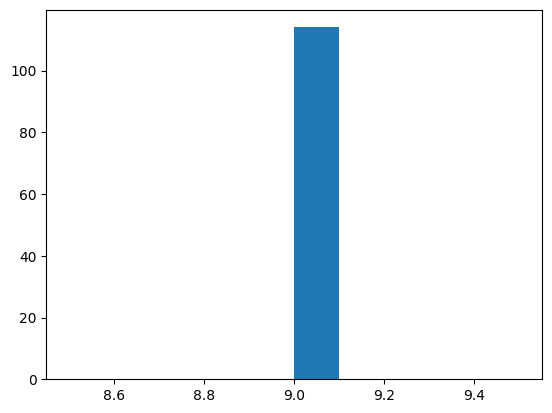

In [81]:
plt.hist(font_sizes, bins=10)
plt.show()

In [78]:
parsed_page

{'width': 612.0,
 'height': 792.0,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (156.24000549316406,
    114.0074462890625,
    326.3744812011719,
    146.48974609375),
   'lines': [{'spans': [{'size': 9.0,
       'flags': 4,
       'font': 'CenturySchoolbook',
       'color': 0,
       'ascender': 0.98583984375,
       'descender': -0.21630859375,
       'text': ' ',
       'origin': (156.24000549316406, 122.8800048828125),
       'bbox': (156.24000549316406,
        114.0074462890625,
        158.74049377441406,
        124.8267822265625)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (156.24000549316406,
      114.0074462890625,
      158.74049377441406,
      124.8267822265625)},
    {'spans': [{'size': 9.0,
       'flags': 4,
       'font': 'CenturySchoolbook',
       'color': 0,
       'ascender': 0.98583984375,
       'descender': -0.21630859375,
       'text': ' ',
       'origin': (275.80499267578125, 122.8800048828125),
       'bbox': (275.80499267578125,
    

In [53]:
np.median(line_lengths)

58.0

In [51]:
np.std(line_lengths)

17.0531179235112

In [54]:
58-17

41

In [70]:
doc_lines

['1',
 '(Slip Opinion)',
 'OCTOBER TERM, 2021',
 'Syllabus',
 'NOTE: Where it is feasible, a syllabus (headnote) will be released, as is',
 'being done in connection with this case, at the time the opinion is issued.',
 'The syllabus constitutes no part of the opinion of the Court but has been',
 'prepared by the Reporter of Decisions for the convenience of the reader.',
 'See  United States  v.  Detroit Timber & Lumber Co.,  200 U. S. 321, 337.',
 'SUPREME COURT OF THE UNITED STATES',
 'Syllabus',
 'DOBBS, STATE HEALTH OFFICER OF THE',
 'MISSISSIPPI DEPARTMENT OF HEALTH,  ET AL .  v .',
 'JACKSON WOMEN’S HEALTH ORGANIZATION  ET AL .',
 'CERTIORARI TO THE UNITED STATES COURT OF APPEALS FOR',
 'THE FIFTH CIRCUIT',
 'No. 19–1392. Argued December 1, 2021—Decided June 24, 2022',
 'Mississippi’s Gestational Age Act provides that “[e]xcept in a medical',
 'emergency or in the case of a severe fetal abnormality, a person shall',
 'not intentionally or knowingly perform . . . or induce an abor

In [92]:
for par in paragraphs:
    num_words = len(par.split(' '))
    print(num_words, par, '\n')

449  NOTE: Where it is feasible, a syllabus (headnote) will be released, as is being done in connection with this case, at the time the opinion is issued. The syllabus constitutes no part of the opinion of the Court but has been prepared by the Reporter of Decisions for the convenience of the reader. See  United States  v.  Detroit Timber & Lumber Co.,  200 U. S. 321, 337. SUPREME COURT OF THE UNITED STATES DOBBS, STATE HEALTH OFFICER OF THE MISSISSIPPI DEPARTMENT OF HEALTH,  ET AL .  v . JACKSON WOMEN’S HEALTH ORGANIZATION  ET AL . CERTIORARI TO THE UNITED STATES COURT OF APPEALS FOR No. 19–1392. Argued December 1, 2021—Decided June 24, 2022 Mississippi’s Gestational Age Act provides that “[e]xcept in a medical emergency or in the case of a severe fetal abnormality, a person shall not intentionally or knowingly perform . . . or induce an abortion of an unborn human being if the probable gestational age of the unborn hu- man being has been determined to be greater than fifteen (15) wee

# Remaining problem, how to remove:
* titles, 
* page numebers
* footnotes

### one more thing i can do: for every new line i can check if it has some indentation, as this infomration moght be provided. 

In [73]:
# check distribution of indentations
# try extracting one line at a time.

page_num = 2
page = doc[page_num]
parsed_page = page.get_text("dict")
parsed_page
# for paragraph in parsed_page['blocks']:
#     for i, line in enumerate(paragraph['lines']):
#         line_text = (' ').join([span['text'] for span in line['spans']])
#         line_text = line_text.rstrip()
#         if len(line_text) > 0:
#             print(line_text, line_text[-1] == '.', '\n')


{'width': 612.0,
 'height': 792.0,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (156.24000549316406,
    114.0074462890625,
    326.3744812011719,
    146.48974609375),
   'lines': [{'spans': [{'size': 9.0,
       'flags': 4,
       'font': 'CenturySchoolbook',
       'color': 0,
       'ascender': 0.98583984375,
       'descender': -0.21630859375,
       'text': ' ',
       'origin': (156.24000549316406, 122.8800048828125),
       'bbox': (156.24000549316406,
        114.0074462890625,
        158.74049377441406,
        124.8267822265625)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (156.24000549316406,
      114.0074462890625,
      158.74049377441406,
      124.8267822265625)},
    {'spans': [{'size': 9.0,
       'flags': 4,
       'font': 'CenturySchoolbook',
       'color': 0,
       'ascender': 0.98583984375,
       'descender': -0.21630859375,
       'text': ' ',
       'origin': (275.80499267578125, 122.8800048828125),
       'bbox': (275.80499267578125,
    